In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
#  Load and Transform the Dataset
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize between -1 to 1
])


In [9]:
#Download CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

100.0%


In [23]:

print(f"Total number of images in traindataset: {len(trainset)}")
print(f"Total number of images in testdataset: {len(testset)}")

Total number of images in traindataset: 50000
Total number of images in testdataset: 10000


In [10]:
# Class names
classes = ('Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck')

In [ ]:
#  Display Sample Images
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

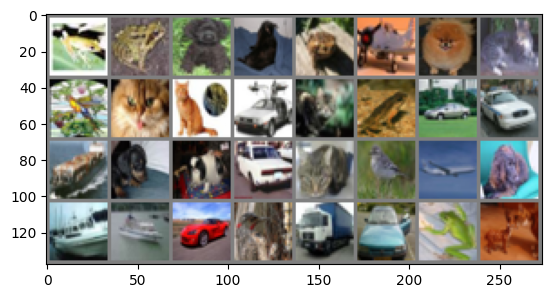

Labels: ['Frog', 'Frog', 'Dog', 'Cat']


In [12]:
 #Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print("Labels:", [classes[labels[j]] for j in range(4)])


In [ ]:
# Define the CNN Model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.fc1 = nn.Linear(128 * 4 * 4, 128)
        self.fc2 = nn.Linear(128, 10)
    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(-1, 128 * 4 * 4)  # Flatten
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)  # No activation for last layer
        return x

In [14]:
# Create model instance
model = CNN()


In [ ]:
#  Define Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
# Train the Model
epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader)}")

print("Training Complete!")

Epoch 1, Loss: 1.329299933812745
Epoch 2, Loss: 0.8994174216774435
Epoch 3, Loss: 0.7229838632881375
Epoch 4, Loss: 0.6059306747758534
Epoch 5, Loss: 0.510221545017841
Epoch 6, Loss: 0.4267753610054957
Epoch 7, Loss: 0.3551372202090628
Epoch 8, Loss: 0.29045899378604145
Epoch 9, Loss: 0.2465363015299776
Epoch 10, Loss: 0.20332457944786536
Training Complete!


In [ ]:
#  Evaluate the Model
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")


Test Accuracy: 74.98%


In [ ]:
#  Make Predictions
dataiter = iter(testloader)
images, labels = next(dataiter)

outputs = model(images)
_, predicted = torch.max(outputs, 1)


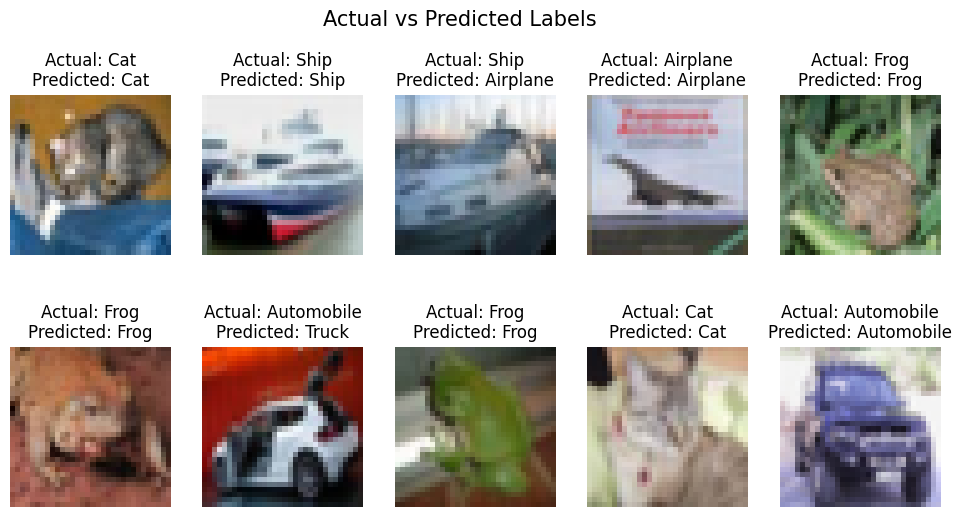

In [ ]:
# 7 Show Predictions vs Actual Images
def visualize_predictions():
    dataiter = iter(testloader)
    images, labels = next(dataiter)

    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

    # Plot 10 images with actual and predicted labels
    fig, axes = plt.subplots(2, 5, figsize=(12, 6))
    fig.suptitle("Actual vs Predicted Labels", fontsize=15)

    for i, ax in enumerate(axes.flat):
        img = images[i] / 2 + 0.5  # Unnormalize
        npimg = img.numpy()
        ax.imshow(np.transpose(npimg, (1, 2, 0)))
        ax.set_title(f"Actual: {classes[labels[i]]}\nPredicted: {classes[predicted[i]]}")
        ax.axis("off")

    plt.show()

# Call the function to display images
visualize_predictions()